# MinK LogProb

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch
import transformer_lens
import transformer_lens.utils as utils
from transformer_lens.hook_points import (
    HookedRootModule,
    HookPoint,
)  # Hooking utilities
from transformer_lens import HookedTransformer, HookedTransformerConfig, FactoredMatrix, ActivationCache
torch.set_grad_enabled(False)
from functools import partial
from tqdm import tqdm

In [ ]:
model = HookedTransformer.from_pretrained("gpt2-xl")

Loaded pretrained model gpt2-xl into HookedTransformer


In [ ]:
def prompt_likelihood(prompt, min_k =3):
    tokens = model.to_tokens(prompt)
    logits, activs = model.run_with_cache(tokens)
    logits = logits[...,:-1,:]
    #print(f"model likelihood: {logits.sum().item()}")
    log_probs = torch.log(torch.nn.functional.softmax(logits, dim=-1))
    pred_toks = tokens.squeeze()[1:] ## shift pack tokens by one index
    lik = log_probs[...,torch.arange(pred_toks.shape[-1]),pred_toks]

    fig, ax = plt.subplots(1, 1, figsize=(14, 2), gridspec_kw={'hspace': 0.4})
    ax = sns.heatmap(lik, cmap=mpl.colormaps["Blues_r"], xticklabels=model.tokenizer.convert_ids_to_tokens(pred_toks.squeeze()), square=False)
    if isinstance(min_k, int):
        lik, lik_indeces = torch.topk(lik, min_k, largest=False, sorted=True)
        #print(model.tokenizer.convert_ids_to_tokens(pred_toks[lik_indeces].squeeze()))
    log_lik = lik.mean()#torch.log(lik).mean()
    print(f"MIN-k={min_k} logprob: {log_lik}")

MIN-k=3 logprob: -7.581172943115234
MIN-k=3 logprob: -10.301939964294434


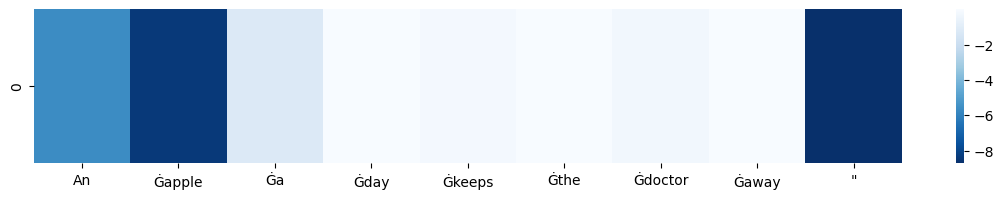

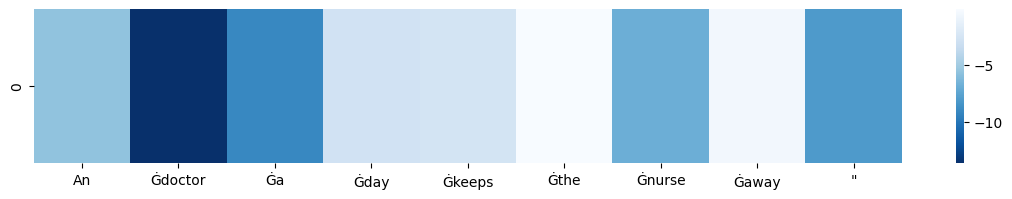

In [ ]:
prompt = 'An apple a day keeps the doctor away"'
#prompt = "The US anthem goes as follows: O! say can you see by the dawn's early light,\nWhat so proudly we hailed by the twilight's last gleaming,"
prompt_likelihood(prompt)

prompt = 'An doctor a day keeps the nurse away"'
#prompt = "The US anthem goes as follows: O! say can you saw by the dawn's early morning,\nWhat so proudly we hailed by the twilight's last gleaming,"
prompt_likelihood(prompt)